In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=[0,1]
sd_x=np.std(data)
np.sqrt(100)*sd_x

5.0

In [6]:
# E(X^2)-(E(X))^2 =var(X_1) , sqrt(var(X_1)) : 상자의 표준편차 
var_x=0*(1/2)+1*(1/2)-(1/2)**2
var_x

0.25

In [ ]:
# 상자의 표준편차: sqrt(0.25)= sqrt(1/4) 
# SE(X)= 상자의 표준편차* sqrt(100) 
# 정규분포의 평균과 표준오차: 1/2, 5 

In [8]:
from scipy.stats import norm # norm 정규분포를 가져온다. 
# Pr(44.5<X<55.5)
mean=50
se=5
probability=norm.cdf(55.5,mean,se) - norm.cdf(44.5, mean,se)
print(probability)

0.7286678781072347


In [ ]:
# 합의 평균: 상자의 평균*n 
# 합의 표준오차: 상자의 표준편차 * sqrt(n) 

In [10]:
data=[1,2,10]
# X_10의 기대값= 상자의 기대값 * 10
EX=np.mean(data)*10 # 합의 기대값
print(EX)


43.33333333333333


In [11]:
# 합의 표준오차
SE_X=np.std(data)*np.sqrt(10)
print(SE_X)

12.736648783028533


In [ ]:
# 상자의 분산을 계산한 후에 sqrt를 취해준다. 그런 후 그 값에 sqrt(10)을 곱해준다. 
# E(X^2)- (E(X))^2 

In [15]:
data=[1,2,10] # 먼저 상자를 정의한다. 
num_draws=100
num_rep=50000

# np.random.choice
np.random.seed(0) 
sums=[]
for i in range(num_rep):
    aa=np.random.choice(data,size=num_draws, replace=True)
    aa1=np.sum(aa) 
    sums.append(aa1)
print(sums) # 50000개 값을 갖는 벡터가 된다. 


[377, 445, 412, 415, 361, 491, 455, 497, 393, 441, 412, 439, 376, 425, 382, 366, 475, 448, 470, 467, 418, 452, 416, 413, 445, 484, 490, 463, 436, 427, 461, 435, 427, 421, 480, 415, 477, 431, 411, 431, 341, 488, 390, 374, 383, 456, 424, 421, 416, 423, 417, 482, 434, 436, 388, 455, 404, 373, 380, 359, 416, 358, 396, 410, 446, 372, 534, 456, 368, 396, 396, 360, 448, 370, 482, 449, 424, 456, 484, 373, 424, 420, 464, 447, 443, 412, 458, 421, 407, 417, 436, 406, 428, 378, 456, 422, 432, 474, 387, 423, 462, 403, 481, 412, 447, 451, 396, 447, 476, 501, 376, 441, 428, 430, 470, 438, 426, 504, 555, 435, 402, 487, 429, 454, 448, 370, 390, 394, 483, 476, 407, 440, 439, 429, 463, 415, 383, 428, 415, 463, 399, 438, 446, 392, 474, 515, 493, 473, 433, 416, 469, 448, 434, 454, 490, 420, 473, 411, 445, 432, 449, 429, 422, 420, 434, 455, 455, 395, 406, 416, 431, 439, 408, 448, 426, 454, 514, 493, 405, 474, 411, 478, 527, 403, 456, 394, 434, 446, 458, 397, 496, 412, 439, 381, 493, 434, 445, 396, 432, 358,

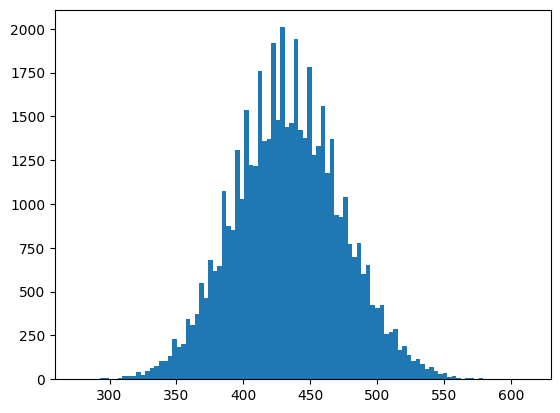

In [16]:
# 경험적 히스토그램을 그린다. 
plt.hist(sums, bins=100)
plt.show()

In [ ]:
# 파이썬을 이용하고자 하는 분은 
# 상자를 잘 정의한다. E(X), SE(X)

In [ ]:
# Lecture Note 7

In [17]:
df=pd.read_csv('c:/temp100/samsung_LN7.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,2010-01-04,16060,16180,16000,16180,239271,0.012516
1,2010-01-05,16520,16580,16300,16440,559219,0.016069
2,2010-01-06,16580,16820,16520,16820,459755,0.023114
3,2010-01-07,16820,16820,16260,16260,443237,-0.033294
4,2010-01-08,16400,16420,16120,16420,295798,0.009840


In [18]:
r=100*(df['Close'].pct_change())
r.describe()

count    3518.000000
mean        0.060797
std         1.663820
min        -8.035714
25%        -0.966393
50%         0.000000
75%         0.983944
max        10.470588
Name: Close, dtype: float64

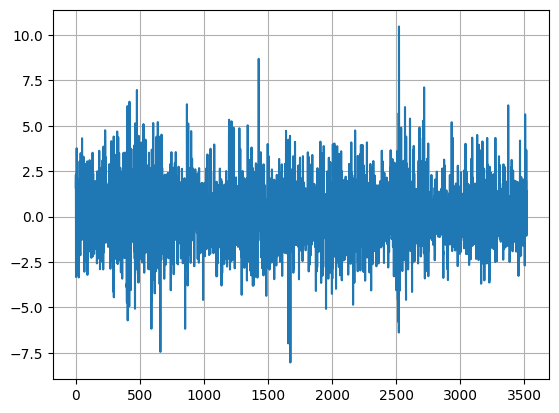

In [20]:
plt.plot(r)
plt.grid()
plt.show()

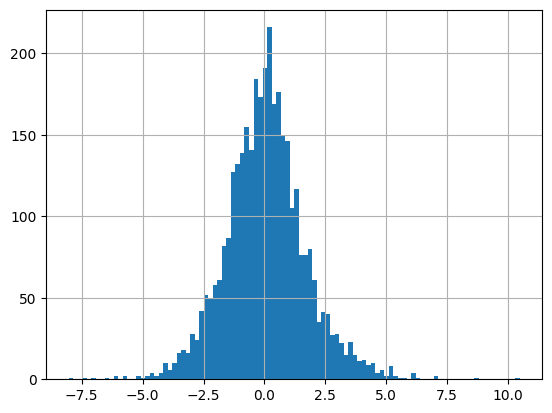

In [22]:
plt.hist(r, bins=100)
plt.grid()
plt.show()

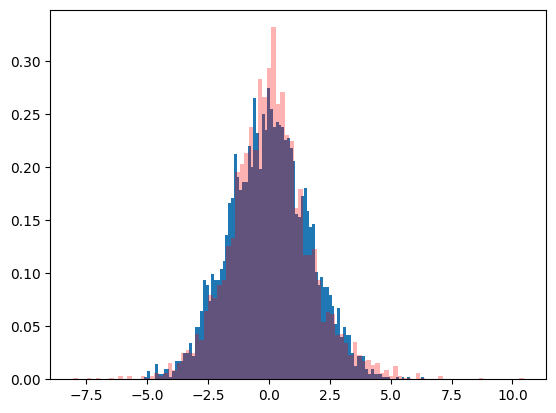

In [27]:
# 가상의 데이터 3518개를 만들어야 한다. 
# 정규분포를 따르고, 평균이 0.06이고 표준편차는 1.66이다. 
n=len(r)  # 3518
np.random.seed(0)
data=np.random.randn(n)*1.66+0.06  # 가상의 데이터는 정규분포를 따르면서 평균은 0.66이고 표준편차는 1.66이다. 

# 가상의 데이터를 이용해서 histogram : 예상은 정규분포 모양일 것이다 
plt.hist(data, bins=100, density=True )  # density 옵션이 없다면 freq가 나타난다. 
plt.hist(r, bins=100, color='red', density=True, alpha=0.3) # 실제 주가수익률 데이터의 히스토그램 
plt.show()
